### 菜菜的sklearn课堂01.决策树

In [1]:
from sklearn import tree

In [1]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [5]:
wine=load_wine()
wine.data.shape
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [6]:
import pandas as pd
pd.concat([pd.DataFrame(wine.data),pd.DataFrame(wine.target)],axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [7]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [8]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [9]:
Xtrain,Xtest,Ytrain,Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [10]:
Xtrain.shape

(124, 13)

In [11]:
Xtest.shape

(54, 13)

In [12]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)

score

0.8888888888888888

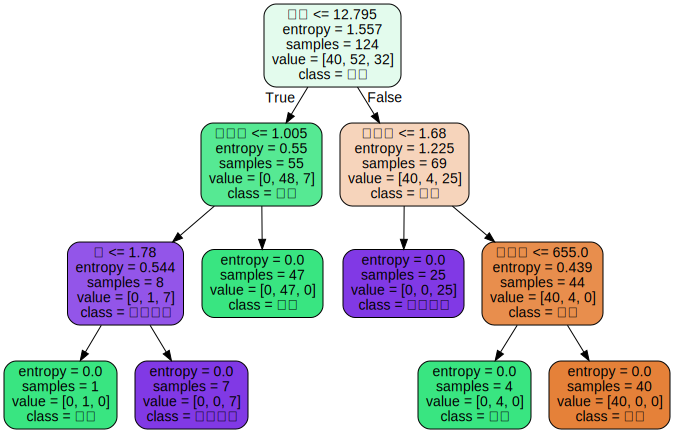

In [16]:
feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
import graphviz
dot_data = tree.export_graphviz(clf
                                ,out_file = None
                                ,feature_names= feature_name
                                ,class_names=["琴酒","雪莉","贝尔摩德"]
                                ,filled=True #填充颜色
                                ,rounded=True
                                )
graph = graphviz.Source(dot_data)
graph

In [17]:
clf.feature_importances_

array([0.40545255, 0.        , 0.02252879, 0.        , 0.        ,
       0.        , 0.47183302, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.10018564])

In [18]:
[*zip(feature_name, clf.feature_importances_)]

[('酒精', 0.4054525507727799),
 ('苹果酸', 0.0),
 ('灰', 0.022528792793840968),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.47183301751493995),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.0),
 ('色调', 0.0),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.10018563891843908)]

In [19]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,splitter="random"
                                 )

In [22]:
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)


In [23]:
score

0.8888888888888888

In [24]:
clf = tree.DecisionTreeClassifier(criterion="entropy"
                                  ,random_state=30
                                  ,max_depth=3
                                  ,splitter="random"
                                  ,min_samples_leaf=10
                                  ,min_samples_split=10
                                 )
clf = clf.fit(Xtrain,Ytrain)
clf.score(Xtest,Ytest)

0.8888888888888888

In [25]:
clf.score(Xtrain,Ytrain)

0.8951612903225806

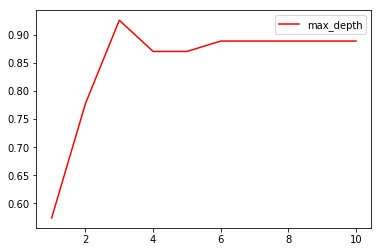

In [30]:
import matplotlib.pyplot as plt

test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(criterion="entropy"
                                      ,random_state=30
                                      ,splitter="random"
                                      ,max_depth = i + 1
                                     )
    clf = clf.fit(Xtrain,Ytrain)
    score = clf.score(Xtest,Ytest)
    test.append(score)

plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [31]:
clf.apply(Xtest)

array([ 5, 30,  5, 30, 29, 20,  5,  5,  5, 30, 30,  6,  9, 30, 30, 30, 30,
       30,  5,  5, 20, 30,  5,  5,  5, 30,  6, 30,  5,  9, 20,  4,  5,  5,
       30, 11, 30, 30,  5, 20,  5, 20, 30, 24,  9,  9, 20,  9,  9,  5,  9,
       30,  9, 24], dtype=int64)

In [32]:
clf.predict(Xtest)

array([2, 0, 2, 0, 1, 1, 2, 2, 2, 0, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 1, 0,
       2, 2, 2, 0, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 0, 0, 2, 1, 2, 1, 0, 0,
       1, 1, 1, 1, 1, 2, 1, 0, 1, 0])

## 回归树

In [34]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeRegressor

boston = load_boston()
regressor = DecisionTreeRegressor(random_state = 0)
# 交叉验证
cross_val_score(regressor
                ,boston.data
                ,boston.target
                ,cv=10
                ,scoring="neg_mean_squared_error"
               )

array([-16.41568627, -10.61843137, -18.30176471, -55.36803922,
       -16.01470588, -44.70117647, -12.2148    , -91.3888    ,
       -57.764     , -36.8134    ])

## 一维回归的图像绘制

In [35]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [38]:
rng = np.random.RandomState(1) # 随机数生成器
X = np.sort(5 * rng.rand(80,1), axis=0)
y = np.sin(X).ravel() # ravel降维函数
y[::5] += 3 * (0.5 - rng.rand(16))

In [39]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis] # 升维切片np.newaxis
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

<Figure size 432x288 with 0 Axes>

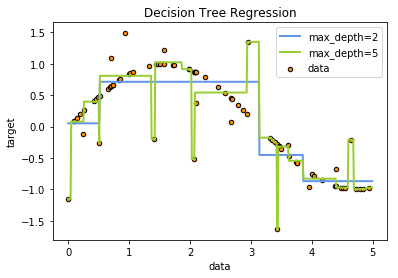

In [42]:
plt.figure()
plt.scatter(X, y, s=20, edgecolors="black", c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

# 4 实例：泰坦尼克号幸存者的预测

In [69]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

In [70]:
data = pd.read_csv("taitanic_data.csv")

In [71]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [73]:
# 删除缺失值过多的列，和观察判断来说和预测的y没有关系的列
data.drop(["Cabin","Name","Ticket"], inplace=True,axis=1)

In [74]:
# 处理缺失值，对缺失值较多的列进行填补，有一些特征只确实一两个值，可以采取直接删除记录的方法
data["Age"] = data["Age"].fillna(data["Age"].mean())
data = data.dropna()

In [75]:
# 将二分类变量转换为数值型变量
# astype能够将一个pandas对象转换为某种类型，和apply(int(x))不同，astype可以将文本类转换为数字，用这个方式可以很便捷地将二分类特征转换为0~1
data["Sex"] = (data["Sex"] == "male").astype("int")

In [76]:
# 将三分类变量转换为数值型变量
labels = data["Embarked"].unique().tolist()
data["Embarked"] = data["Embarked"].apply(lambda x:labels.index(x))

In [77]:
data["Sex"]

0      1
1      0
2      0
3      0
4      1
      ..
886    1
887    0
888    0
889    1
890    1
Name: Sex, Length: 889, dtype: int32

In [78]:
# 查看处理后的数据集
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0
1,2,1,1,0,38.0,1,0,71.2833,1
2,3,1,3,0,26.0,0,0,7.9250,0
3,4,1,1,0,35.0,1,0,53.1000,0
4,5,0,3,1,35.0,0,0,8.0500,0


In [79]:
X = data.iloc[:,data.columns != "Survived"]
y = data.iloc[:,data.columns == "Survived"]

Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size=0.3)

In [80]:
Xtrain

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
486,487,1,0,35.000000,1,0,90.0000,0
124,125,1,1,54.000000,0,1,77.2875,0
106,107,3,0,21.000000,0,0,7.6500,0
33,34,2,1,66.000000,0,0,10.5000,0
69,70,3,1,26.000000,2,0,8.6625,0
...,...,...,...,...,...,...,...,...
340,341,2,1,2.000000,1,1,26.0000,0
645,646,1,1,48.000000,1,0,76.7292,1
591,592,1,0,52.000000,1,0,78.2667,1
48,49,3,1,29.699118,2,0,21.6792,1


只要索引变乱，而且不是有意保持乱序索引的，就要将索引重新排序（从0开始）：

Xtrain.index = range(Xtrain.shape[0])

X.reset_index(drop=True,inplace=True)

In [81]:
# 修正测试集和训练集的索引
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [82]:
type(Ytrain)

pandas.core.frame.DataFrame

In [83]:
Ytrain.head()

,Survived
0,1
1,0
2,1
3,0
4,0


In [84]:
clf = DecisionTreeClassifier(random_state=25)
clf = clf.fit(Xtrain, Ytrain)
score_ = clf.score(Xtest, Ytest)

score_

0.7265917602996255

In [85]:
#交叉验证
score = cross_val_score(clf,X,y,cv=10).mean()

In [86]:
score

0.7469611848825333

0.8166624106230849


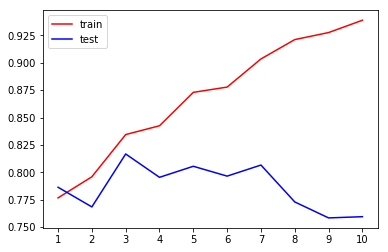

In [88]:
tr = []
te = []
for i in range(10):
    clf = DecisionTreeClassifier(random_state=25
                                 ,max_depth=i+1
                                 ,criterion="entropy"
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf,X,y,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()

In [89]:
import numpy as np
gini_thresholds = np.linspace(0,0.5,20)

parameters = {'splitter':('best','random')
                ,'criterion':("gini","entropy")
                ,"max_depth":[*range(1,10)]
                ,'min_samples_leaf':[*range(1,50,5)]
                ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
             }
clf = DecisionTreeClassifier(random_state=25)
GS = GridSearchCV(clf,parameters,cv=10)
GS.fit(Xtrain,Ytrain)

GS.best_params_
GS.best_score_

0.8295442908346133